## Top 10 Scoring Batsman in the Tournament

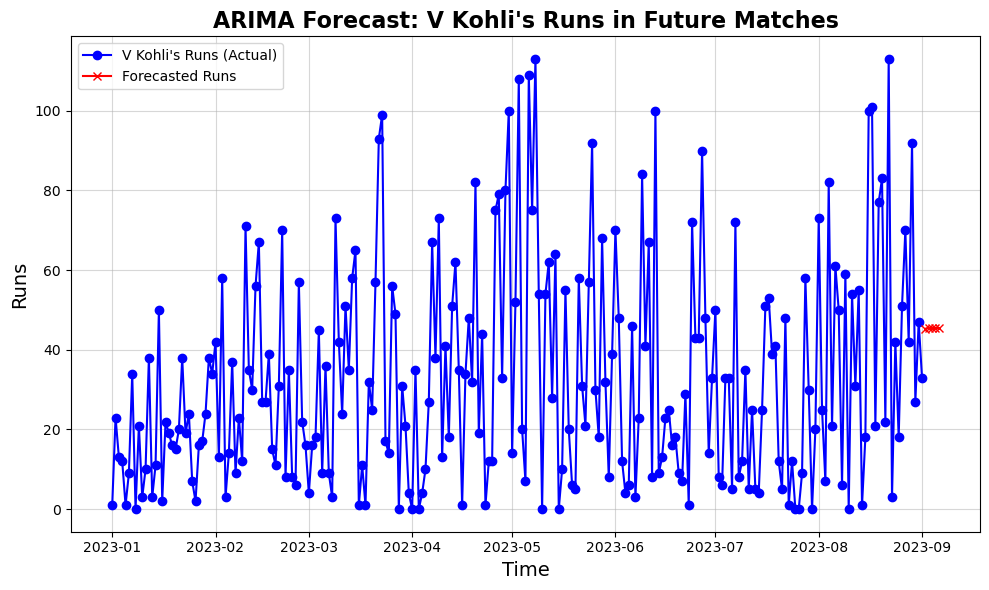

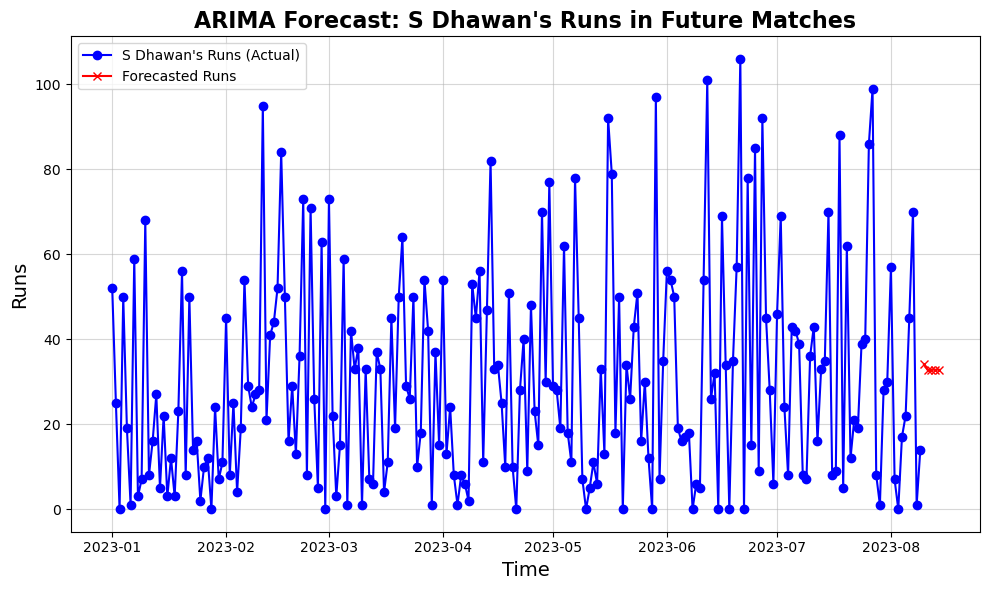

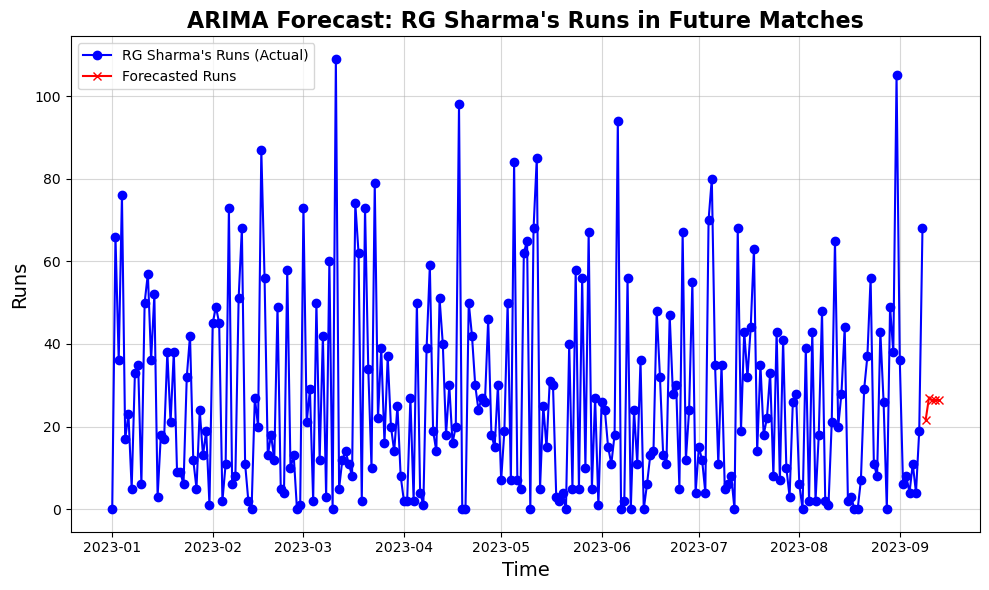

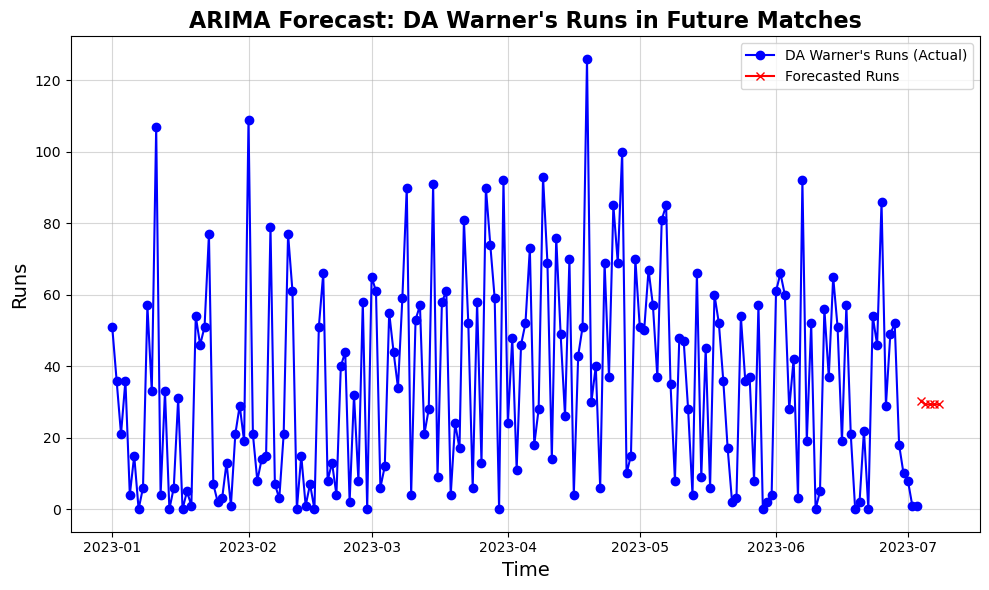

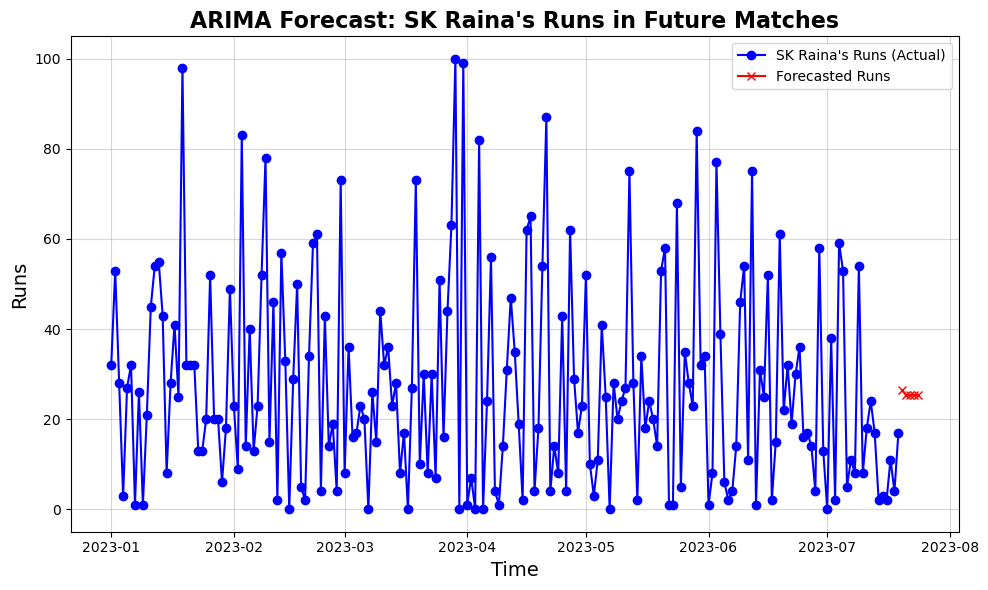

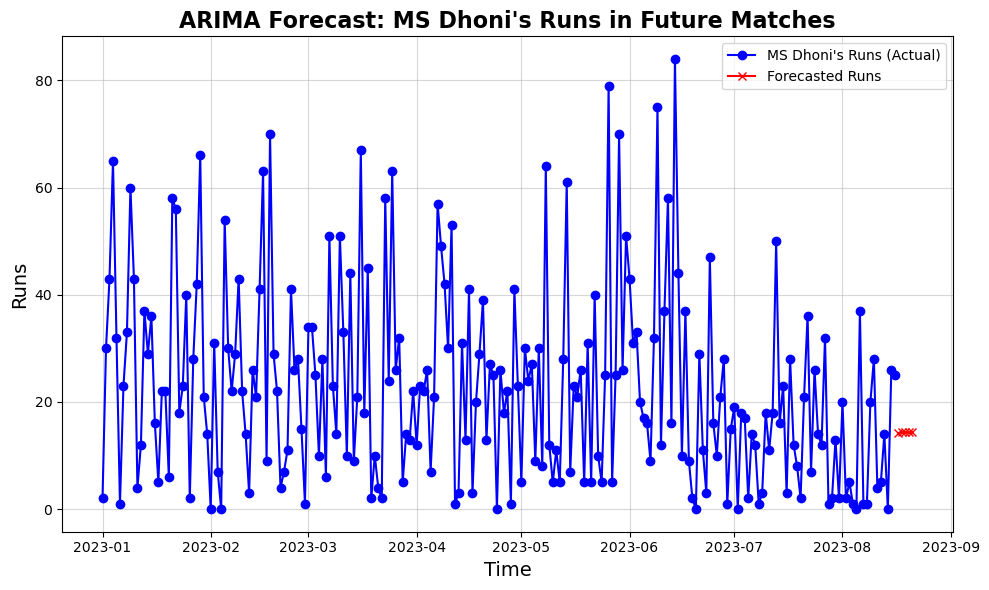

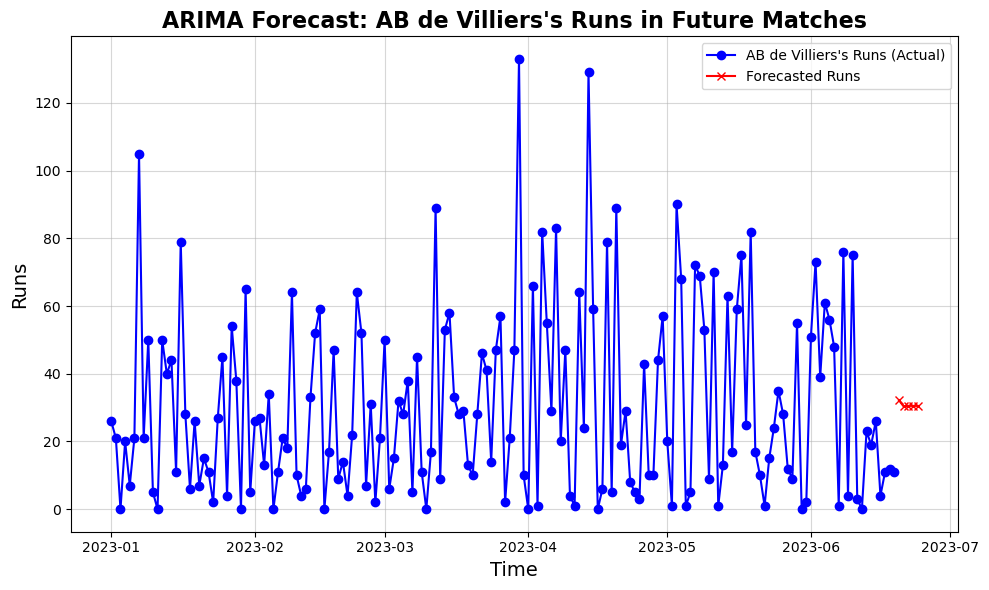

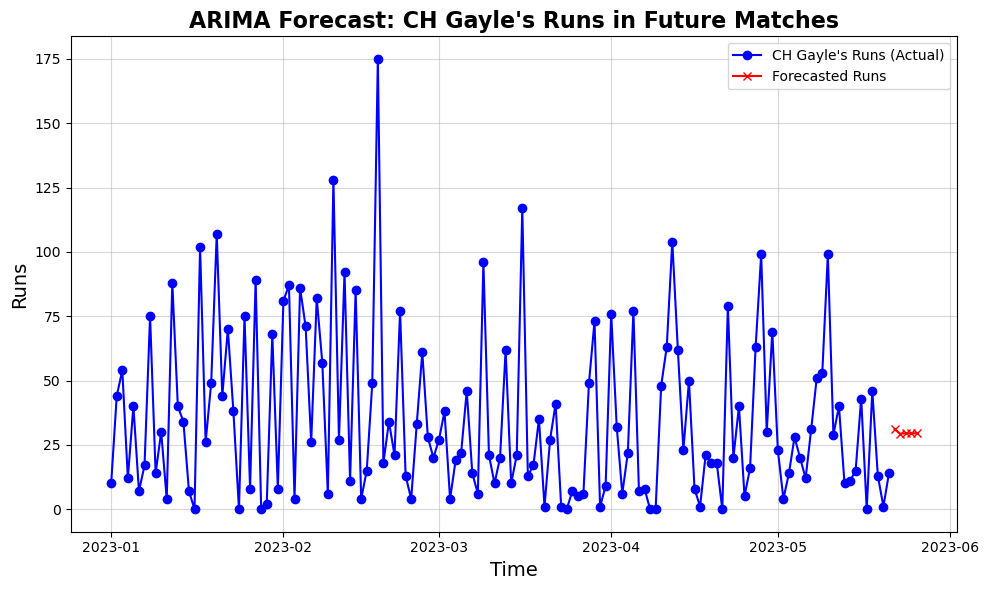

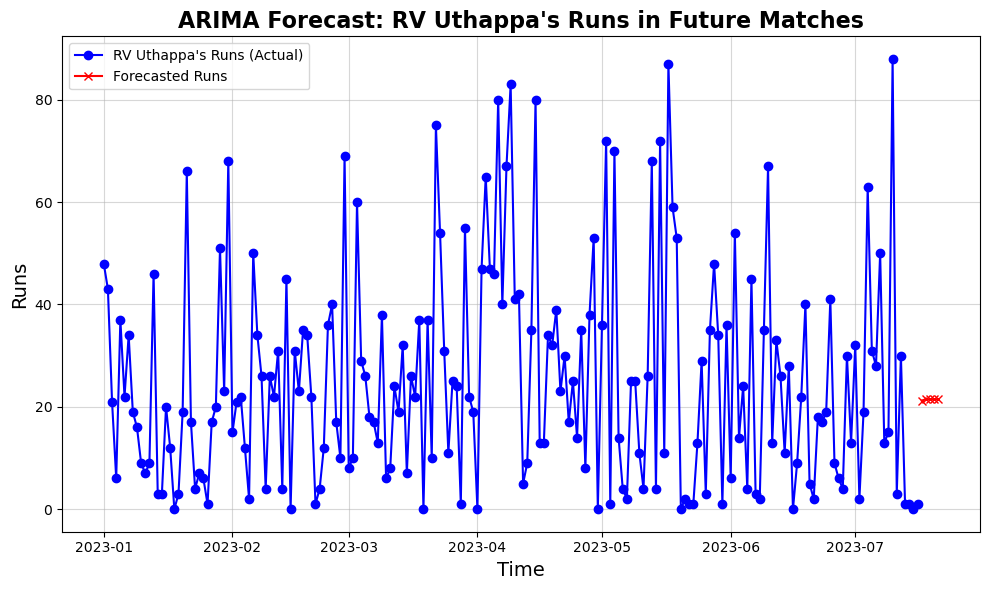

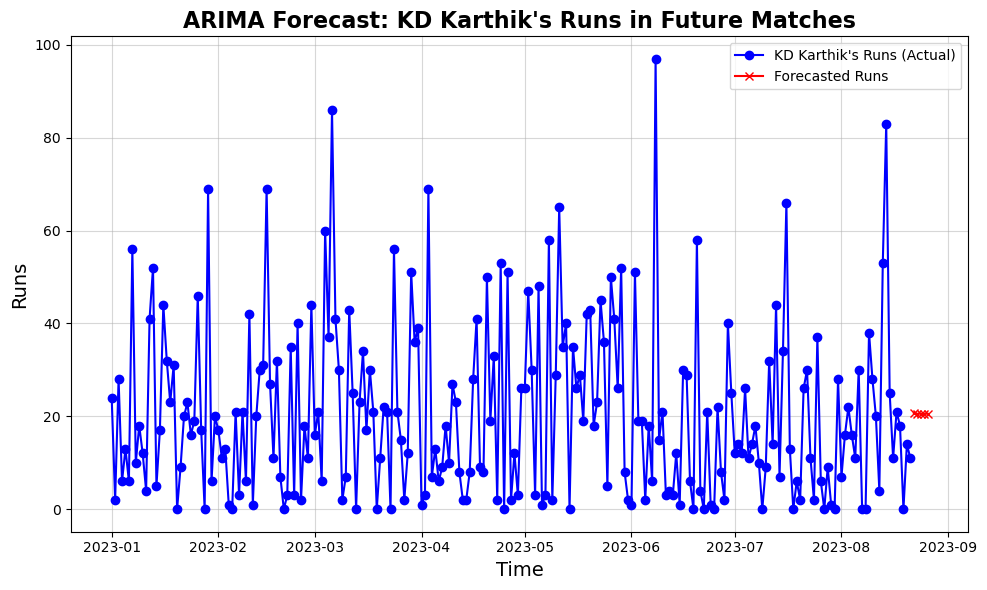

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv('matches.csv')

# Calculate total runs scored by each batsman
batsman_scores = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()

# Get the top 10 highest-scoring batsmen
top_10_batsmen = batsman_scores.sort_values(by='batsman_runs', ascending=False).head(10)

# Function to apply ARIMA model for a single player
def arima_forecast(batsman_name, deliveries, n_forecast=5):
    # Get match-wise runs scored by the batsman
    batsman_data = deliveries[deliveries['batter'] == batsman_name]
    match_runs = batsman_data.groupby('match_id')['batsman_runs'].sum().reset_index()

    # Create a sequential index with an explicit frequency
    match_runs['sequential_index'] = pd.date_range(start='2023-01-01', periods=len(match_runs), freq='D')
    match_runs.set_index(pd.DatetimeIndex(match_runs['sequential_index'], freq='D'), inplace=True)
    match_runs.drop(columns=['sequential_index'], inplace=True)

    # Fit ARIMA model
    model = ARIMA(match_runs['batsman_runs'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future runs
    forecast = model_fit.forecast(steps=n_forecast)

    # Plot the actual and forecasted runs
    plt.figure(figsize=(10, 6))
    plt.plot(match_runs.index, match_runs['batsman_runs'], marker='o', color='blue', label=f"{batsman_name}'s Runs (Actual)")
    plt.plot(
        pd.date_range(match_runs.index[-1], periods=n_forecast + 1, freq='D')[1:],
        forecast,
        marker='x',
        color='red',
        label='Forecasted Runs'
    )
    plt.title(f"ARIMA Forecast: {batsman_name}'s Runs in Future Matches", fontsize=16, weight='bold')
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Runs", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Apply ARIMA model for each of the top 10 batsmen
for batsman in top_10_batsmen['batter']:
    arima_forecast(batsman, deliveries)

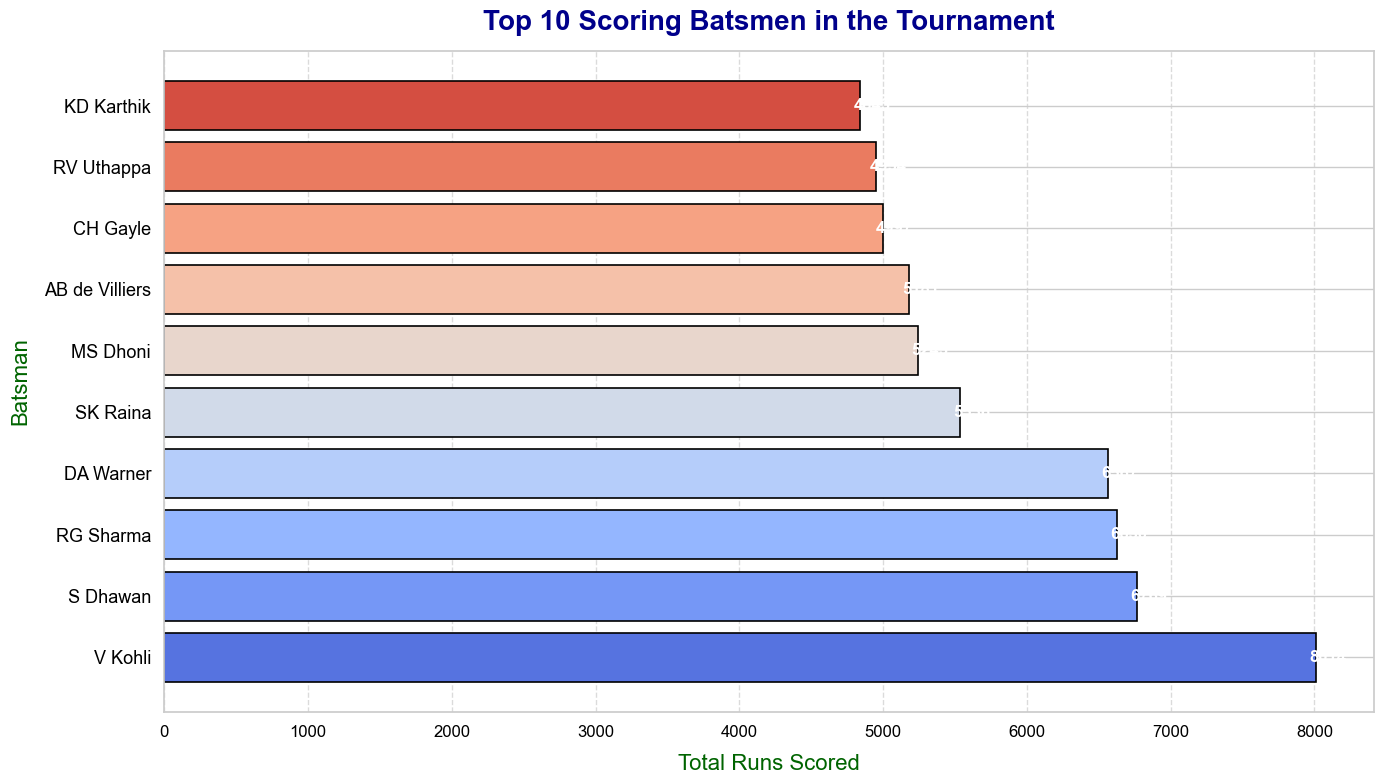

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a horizontal bar graph with Seaborn styling
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")  # Use Seaborn's whitegrid theme

# Use a bold color palette
colors = sns.color_palette("coolwarm", len(top_10_batsmen))
bars = plt.barh(
    top_10_batsmen['batter'], 
    top_10_batsmen['batsman_runs'], 
    color=colors, 
    edgecolor="black", linewidth=1.2
)

# Add values at the end of the bars
for bar in bars:
    plt.text(
        bar.get_width() - 50, 
        bar.get_y() + bar.get_height() / 2, 
        int(bar.get_width()), 
        va='center', 
        color='white', 
        fontsize=12, 
        fontweight='bold'
    )

# Add title and labels with enhanced styling
plt.title("Top 10 Scoring Batsmen in the Tournament", fontsize=20, weight='bold', color='darkblue', pad=15)
plt.xlabel("Total Runs Scored", fontsize=16, labelpad=10, color='darkgreen')
plt.ylabel("Batsman", fontsize=16, labelpad=10, color='darkgreen')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=13, color='black')

# Add a grid with subtle styling
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()

## Top 10 highest scorers in a match of IPL

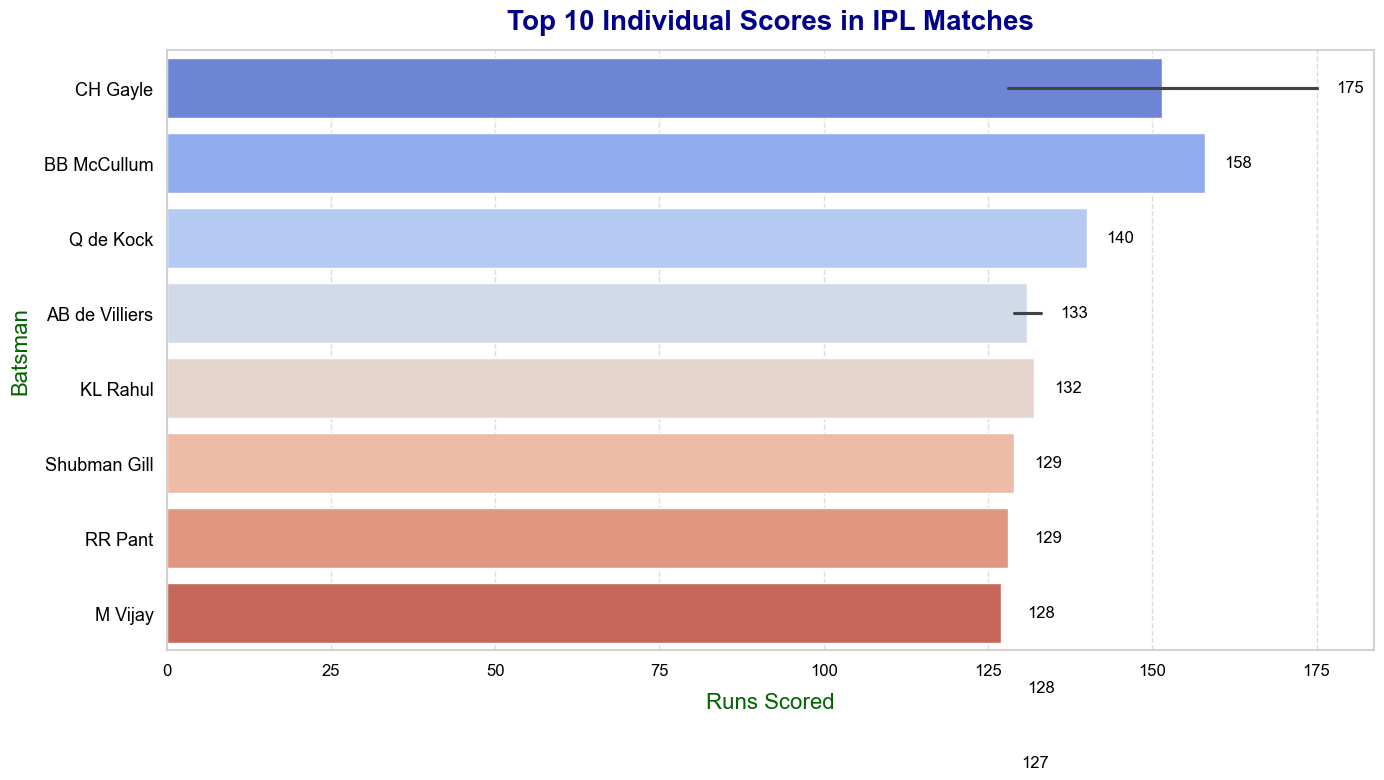

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Group by match_id and batter to get individual match scores
batter_scores = (
    deliveries.groupby(['match_id', 'batter'])['batsman_runs']
    .sum()
    .reset_index()
)

# Step 2: Identify the Top 10 individual scores
top_scores = batter_scores.sort_values('batsman_runs', ascending=False).head(10)

# Step 3: Extracting the match ID and runs for ARIMA trend analysis
top_scores_trend = top_scores[['match_id', 'batsman_runs']].set_index('match_id')

# Step 4: Fit ARIMA model to forecast scores (if enough data points are available)
if len(top_scores_trend) > 10:  # ARIMA requires sufficient data
    model = ARIMA(top_scores_trend, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)
    print("Forecast for top scores:", forecast)

# Step 5: Visualization - Enhanced Top 10 Scores Horizontal Bar Chart
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Dynamically adjust the color palette to match the number of unique bars
unique_batsmen = top_scores['batter'].nunique()  # Count unique batsmen
colors = sns.color_palette("coolwarm", n_colors=unique_batsmen)  # Match palette size to unique batsmen

sns.barplot(
    x=top_scores['batsman_runs'],
    y=top_scores['batter'],
    palette=colors,
    hue=top_scores['batter'],  # Explicitly set the hue to the batter
    dodge=False,  # Prevent color issues with hue
    legend=False  # Suppress legend as it’s unnecessary here
)

# Adding titles and labels with improved styling
plt.title('Top 10 Individual Scores in IPL Matches', fontsize=20, weight='bold', color='darkblue', pad=15)
plt.xlabel('Runs Scored', fontsize=16, labelpad=10, color='darkgreen')
plt.ylabel('Batsman', fontsize=16, labelpad=10, color='darkgreen')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=13, color='black')

# Annotate scores at the end of the bars
for index, value in enumerate(top_scores['batsman_runs']):
    plt.text(value + 3, index, str(value), color='black', fontsize=12, va='center')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()

# Display the plot
plt.show()

## Top 10 Bowlers with the highest number of wickets.

C:\Users\acer\AppData\Local\Temp\ipykernel_9668\763604102.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


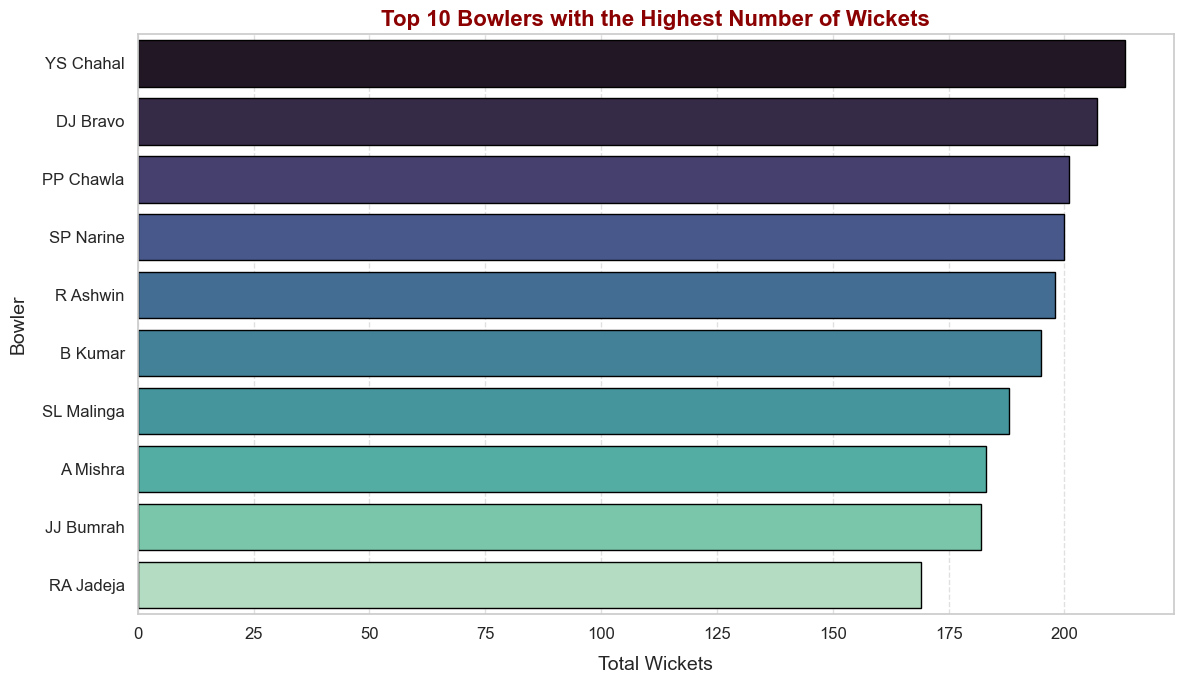

In [32]:
# Step 1: Filter deliveries for wickets and group by bowler
bowlers_wickets = (
    deliveries[deliveries['is_wicket'] == 1]
    .groupby('bowler')['is_wicket']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 2: Prepare data for ARIMA (dummy example if needed)
# Assuming we have a time-based trend for analysis (e.g., season-wise wickets)
# Uncomment the following if you want to use ARIMA for time-series analysis
#bowlers_trend = deliveries.groupby(['season', 'bowler'])['is_wicket'].sum()
# ARIMA analysis would go here if sufficient time-series data is available

# Step 3: Visualization - Top 10 Bowlers by Wickets
plt.figure(figsize=(12, 7))
sns.barplot(
    x=bowlers_wickets['is_wicket'],
    y=bowlers_wickets['bowler'],
    palette="mako",
    edgecolor="black"
)

# Adding titles and labels
plt.title('Top 10 Bowlers with the Highest Number of Wickets', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Total Wickets', fontsize=14, labelpad=10)
plt.ylabel('Bowler', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

## Strike Rate calculation for batsmen with a minimum target run threshold

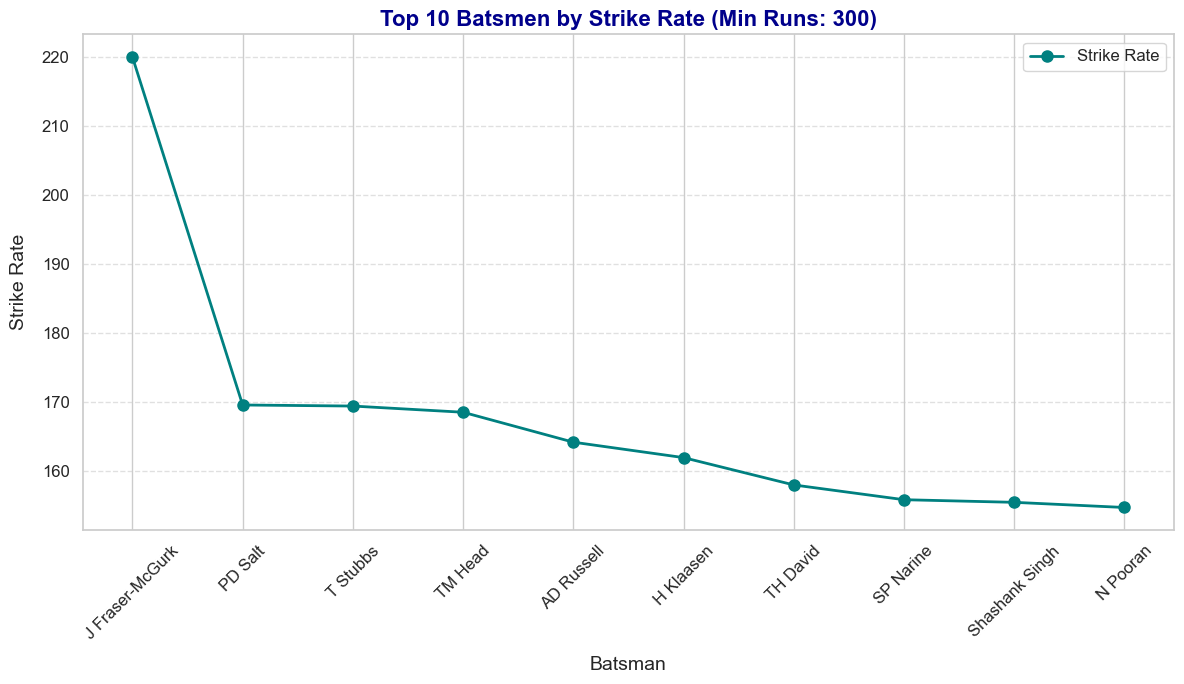

In [35]:
# Step 1: Calculate total runs and balls faced for each batsman
batsman_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
)

# Step 2: Add a strike rate column
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Step 3: Filter batsmen with a minimum run threshold (e.g., 300 runs)
min_run_threshold = 300
filtered_batsmen = batsman_stats[batsman_stats['total_runs'] >= min_run_threshold]

# Step 4: Sort by strike rate and pick the top 10
top_strike_rate_batsmen = filtered_batsmen.sort_values('strike_rate', ascending=False).head(10)

# Step 5: Create a Line Graph
plt.figure(figsize=(12, 7))
plt.plot(
    top_strike_rate_batsmen.index,
    top_strike_rate_batsmen['strike_rate'],
    marker='o',
    linestyle='-',
    color='teal',
    linewidth=2,
    markersize=8,
    label='Strike Rate'
)

# Adding titles and labels
plt.title('Top 10 Batsmen by Strike Rate (Min Runs: 300)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Batsman', fontsize=14, labelpad=10)
plt.ylabel('Strike Rate', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


## List of players with the highest number of "Man of the Match" awards

C:\Users\acer\AppData\Local\Temp\ipykernel_9668\2952646710.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


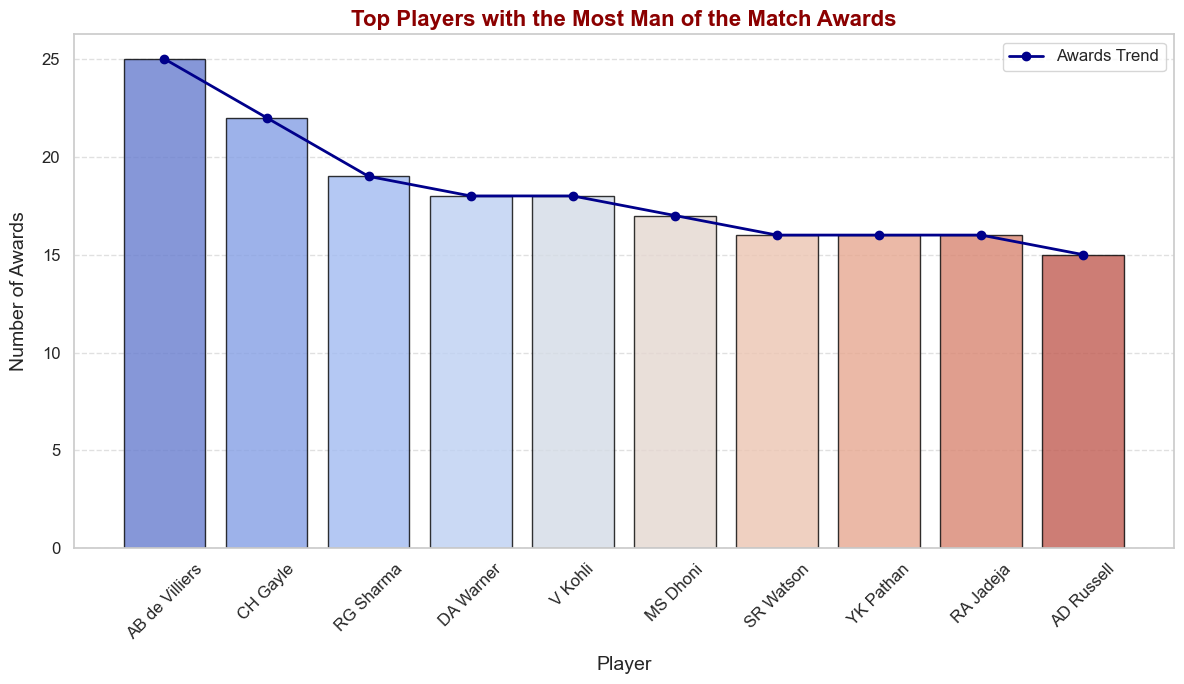

In [38]:

# Step 1: Group by 'player_of_match' and count the awards
mom_counts = (
    matches['player_of_match']
    .value_counts()
    .head(10)
    .reset_index()
)

# Step 2: Rename columns for clarity
mom_counts.columns = ['player', 'awards']

# Step 3: Visualization - Line-Bar Chart
plt.figure(figsize=(12, 7))

# Bar plot for awards
sns.barplot(
    x='player',
    y='awards',
    data=mom_counts,
    palette="coolwarm",
    edgecolor="black",
    alpha=0.8
)

# Line plot overlay
plt.plot(
    mom_counts['player'],
    mom_counts['awards'],
    color='darkblue',
    marker='o',
    linewidth=2,
    label='Awards Trend'
)

# Adding titles and labels
plt.title('Top Players with the Most Man of the Match Awards', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Player', fontsize=14, labelpad=10)
plt.ylabel('Number of Awards', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(loc='upper right', fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_9668\4064308764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bowlers['economy_rate'] = (


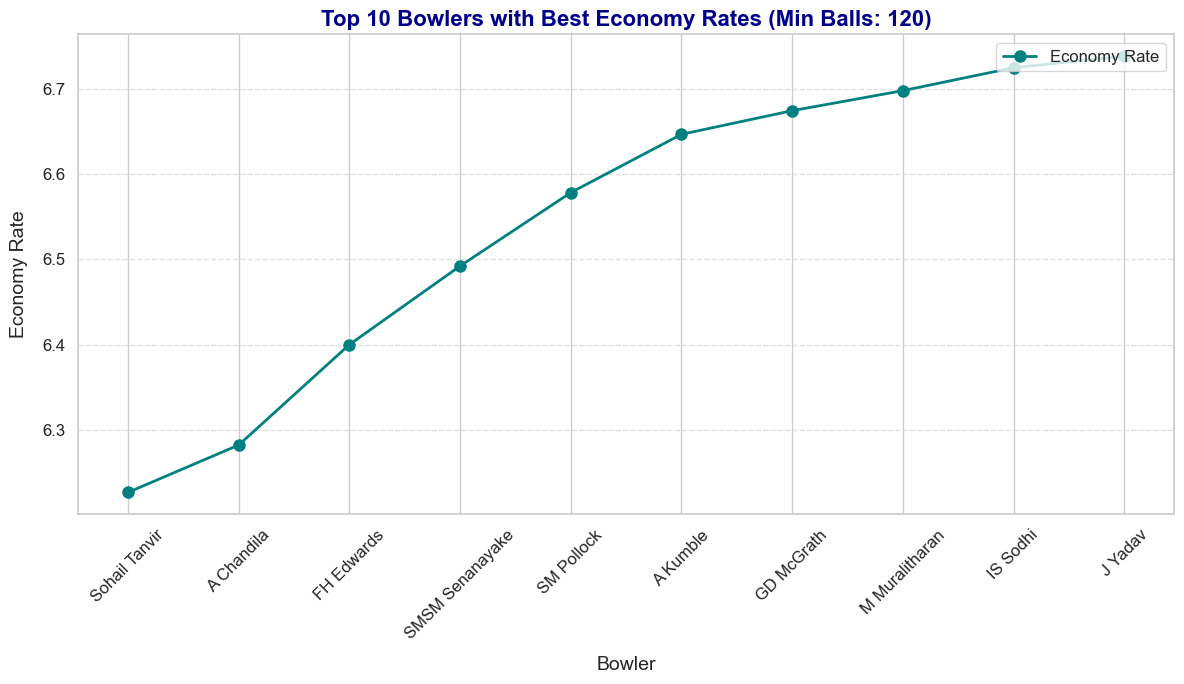

In [40]:
# Step 1: Calculate total runs conceded and balls bowled for each bowler
bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
)

# Step 2: Filter bowlers who exceed a specific ball limit
ball_limit = 120  # Example: Minimum 120 balls bowled
filtered_bowlers = bowler_stats[bowler_stats['balls_bowled'] > ball_limit]

# Step 3: Calculate Economy Rate
filtered_bowlers['economy_rate'] = (
    filtered_bowlers['total_runs_conceded'] / filtered_bowlers['balls_bowled']
) * 6

# Step 4: Sort by Economy Rate (ascending order for the best economy)
top_economy_bowlers = filtered_bowlers.sort_values('economy_rate').head(10)

# Step 5: Visualization - Line Graph
plt.figure(figsize=(12, 7))
plt.plot(
    top_economy_bowlers.index,
    top_economy_bowlers['economy_rate'],
    marker='o',
    linestyle='-',
    color='teal',
    linewidth=2,
    markersize=8,
    label='Economy Rate'
)

# Adding titles and labels
plt.title('Top 10 Bowlers with Best Economy Rates (Min Balls: 120)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Bowler', fontsize=14, labelpad=10)
plt.ylabel('Economy Rate', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


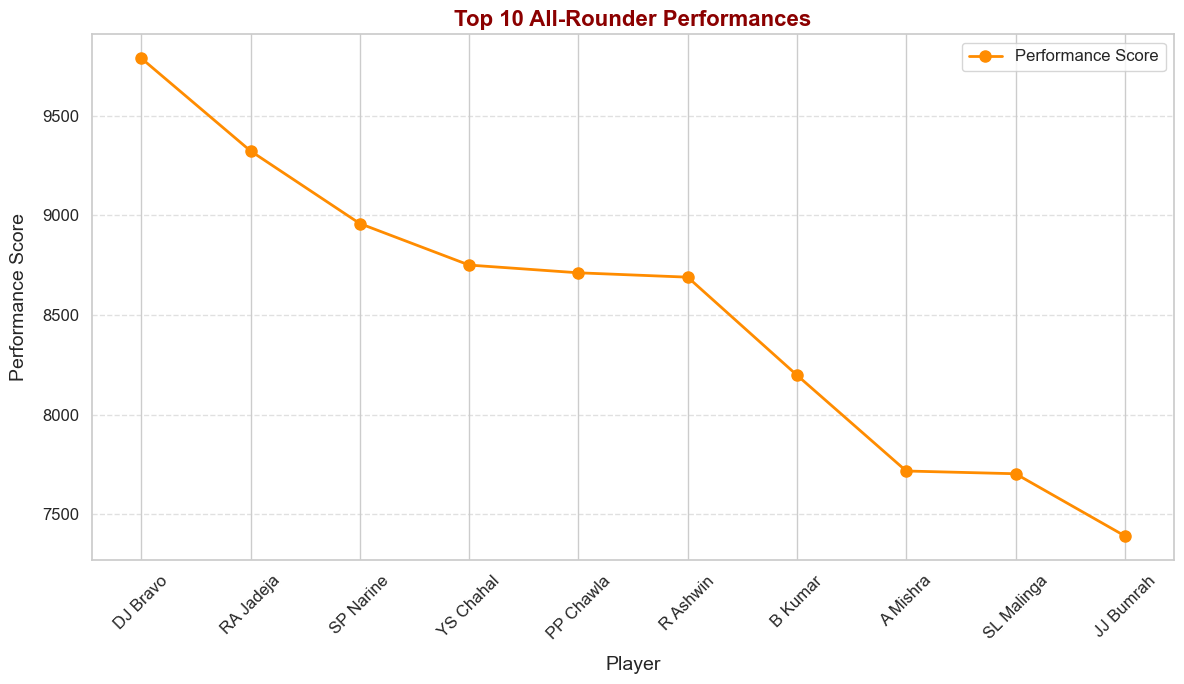

In [42]:
# Step 1: Batting Performance - Total Runs
batting_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum')
).reset_index()

# Step 2: Bowling Performance - Total Wickets and Economy Rate
bowling_stats = deliveries.groupby('bowler').agg(
    total_wickets=('is_wicket', 'sum'),
    total_runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
).reset_index()

# Calculate economy rate
bowling_stats['economy_rate'] = (bowling_stats['total_runs_conceded'] / bowling_stats['balls_bowled']) * 6

# Step 3: Fielding Performance - Total Dismissals
fielding_stats = deliveries.groupby('fielder').agg(
    total_dismissals=('player_dismissed', 'count')
).reset_index()

# Step 4: Merge Batting, Bowling, and Fielding Stats
# Rename columns for clarity before merging
batting_stats.rename(columns={'batter': 'player'}, inplace=True)
bowling_stats.rename(columns={'bowler': 'player'}, inplace=True)
fielding_stats.rename(columns={'fielder': 'player'}, inplace=True)

# Merge all-rounder data
all_rounder_stats = pd.merge(batting_stats, bowling_stats, on='player', how='outer')
all_rounder_stats = pd.merge(all_rounder_stats, fielding_stats, on='player', how='outer').fillna(0)

# Step 5: Calculate Composite Performance Score
# Example weights: Batting 50%, Bowling 40%, Fielding 10%
all_rounder_stats['performance_score'] = (
    (all_rounder_stats['total_runs'] * 0.5) +           # Batting score
    (all_rounder_stats['total_wickets'] * 40) -         # Bowling score (wickets weighted heavily)
    (all_rounder_stats['economy_rate'] * 10) +          # Economy rate (negatively affects performance)
    (all_rounder_stats['total_dismissals'] * 10)        # Fielding score
)

# Step 6: Sort and Select Top 10 All-Rounders
top_all_rounders = all_rounder_stats.sort_values('performance_score', ascending=False).head(10)

# Step 7: Visualization - Line Graph
plt.figure(figsize=(12, 7))
plt.plot(
    top_all_rounders['player'],
    top_all_rounders['performance_score'],
    marker='o',
    linestyle='-',
    color='darkorange',
    linewidth=2,
    markersize=8,
    label='Performance Score'
)

# Adding titles and labels
plt.title('Top 10 All-Rounder Performances', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Player', fontsize=14, labelpad=10)
plt.ylabel('Performance Score', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


## Innings-wise batting and bowling averages for each team.

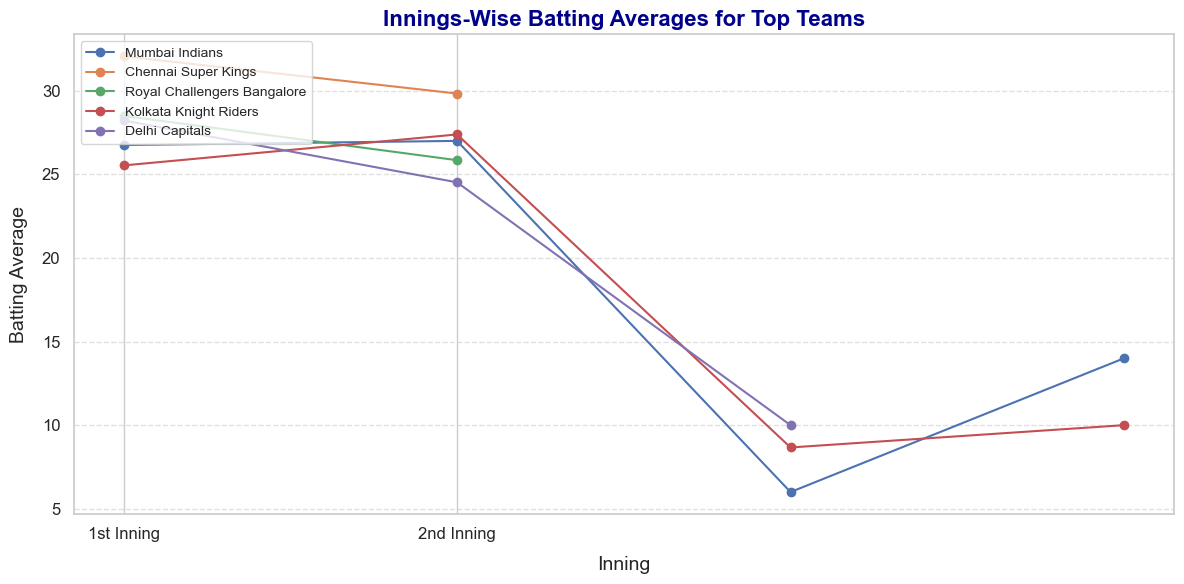

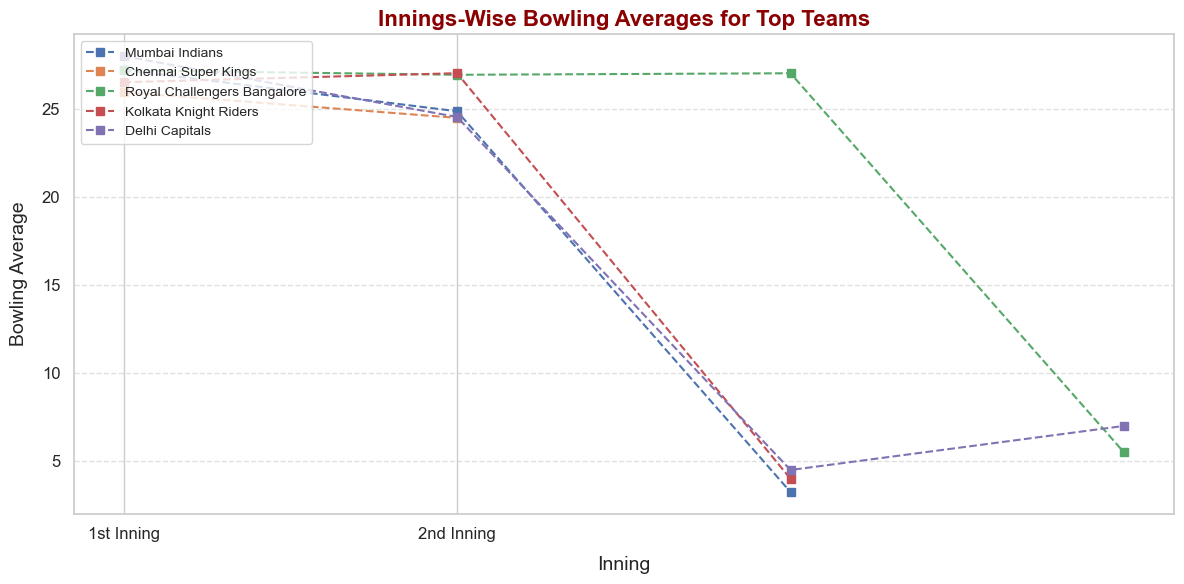

In [47]:
# Step 1: Prepare the data for batting and bowling averages
# Total runs scored and wickets lost by team in each inning
batting_data = deliveries.groupby(['batting_team', 'inning']).agg(
    total_runs=('total_runs', 'sum'),
    wickets_lost=('is_wicket', 'sum')
).reset_index()

# Total runs conceded and wickets taken by team in each inning
bowling_data = deliveries.groupby(['bowling_team', 'inning']).agg(
    runs_conceded=('total_runs', 'sum'),
    wickets_taken=('is_wicket', 'sum')
).reset_index()

# Step 2: Merge batting and bowling data into a single dataframe
batting_data.rename(columns={'batting_team': 'team'}, inplace=True)
bowling_data.rename(columns={'bowling_team': 'team'}, inplace=True)
team_stats = pd.merge(batting_data, bowling_data, on=['team', 'inning'], how='inner')

# Step 3: Calculate batting and bowling averages
team_stats['batting_average'] = team_stats['total_runs'] / team_stats['wickets_lost']
team_stats['bowling_average'] = team_stats['runs_conceded'] / team_stats['wickets_taken']

# Replace NaN values (e.g., division by zero) with 0
team_stats.fillna(0, inplace=True)

# Step 4: Select top teams to simplify visualization
top_teams = ['Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Capitals']
filtered_stats = team_stats[team_stats['team'].isin(top_teams)]

# Step 5: Plotting Batting Averages
plt.figure(figsize=(12, 6))
for team in top_teams:
    team_data = filtered_stats[filtered_stats['team'] == team]
    plt.plot(
        team_data['inning'],
        team_data['batting_average'],
        marker='o',
        linestyle='-',
        label=team
    )

# Adding titles and labels for Batting Averages
plt.title('Innings-Wise Batting Averages for Top Teams', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Inning', fontsize=14, labelpad=10)
plt.ylabel('Batting Average', fontsize=14, labelpad=10)
plt.xticks([1, 2], labels=['1st Inning', '2nd Inning'], fontsize=12)
plt.yticks(fontsize=12)

# Add a legend for Batting Averages
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 6: Plotting Bowling Averages
plt.figure(figsize=(12, 6))
for team in top_teams:
    team_data = filtered_stats[filtered_stats['team'] == team]
    plt.plot(
        team_data['inning'],
        team_data['bowling_average'],
        marker='s',
        linestyle='--',
        label=team
    )

# Adding titles and labels for Bowling Averages
plt.title('Innings-Wise Bowling Averages for Top Teams', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Inning', fontsize=14, labelpad=10)
plt.ylabel('Bowling Average', fontsize=14, labelpad=10)
plt.xticks([1, 2], labels=['1st Inning', '2nd Inning'], fontsize=12)
plt.yticks(fontsize=12)

# Add a legend for Bowling Averages
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Win/loss analysis by runs or wickets for each team.

<Figure size 1400x800 with 0 Axes>

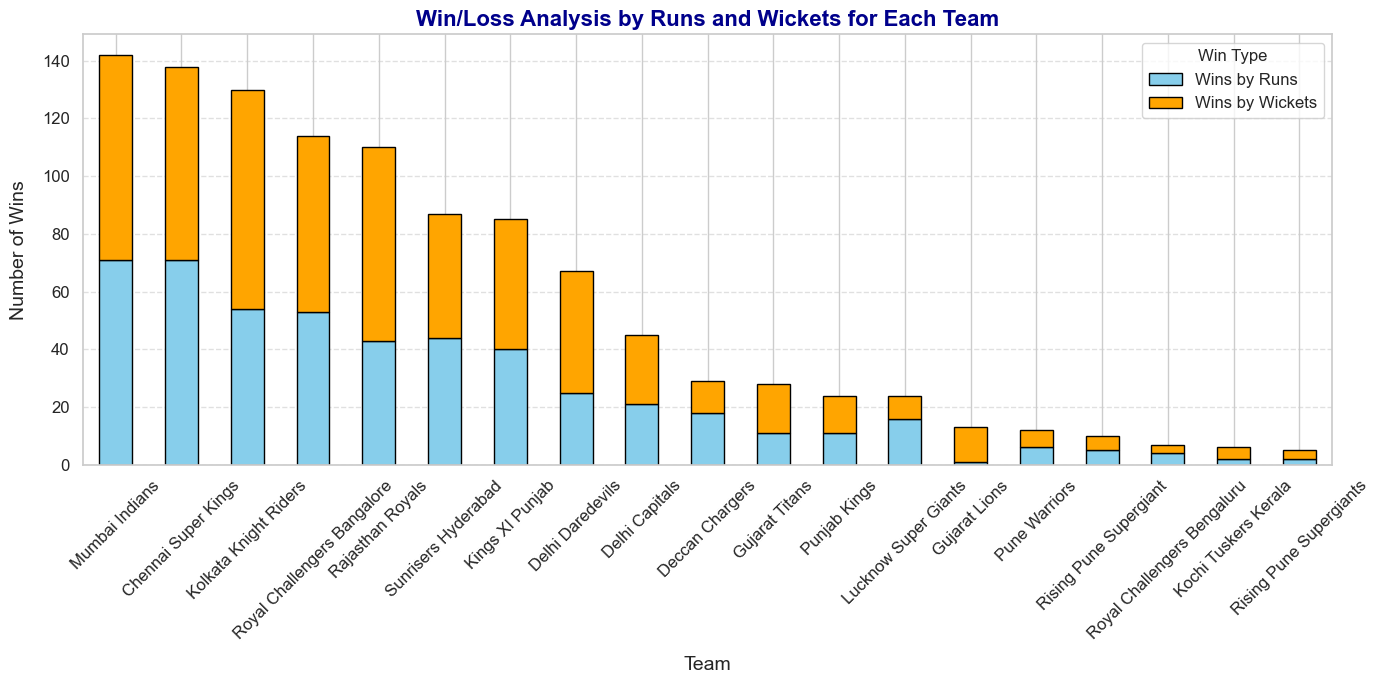

In [50]:
# Step 1: Filter data for win type (by runs or by wickets)
win_data = matches[['winner', 'result', 'result_margin']].dropna()

# Step 2: Group data by team and win type
# Wins by runs
wins_by_runs = win_data[win_data['result'] == 'runs'].groupby('winner').size()

# Wins by wickets
wins_by_wickets = win_data[win_data['result'] == 'wickets'].groupby('winner').size()

# Step 3: Combine the data into a single dataframe
win_summary = pd.DataFrame({
    'Wins by Runs': wins_by_runs,
    'Wins by Wickets': wins_by_wickets
}).fillna(0).astype(int)

# Sort teams by total wins for better visualization
win_summary['Total Wins'] = win_summary['Wins by Runs'] + win_summary['Wins by Wickets']
win_summary = win_summary.sort_values('Total Wins', ascending=False)

# Step 4: Visualization - Stacked Bar Chart
plt.figure(figsize=(14, 8))
win_summary[['Wins by Runs', 'Wins by Wickets']].plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'orange'],
    edgecolor='black',
    figsize=(14, 7)
)

# Adding titles and labels
plt.title('Win/Loss Analysis by Runs and Wickets for Each Team', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Team', fontsize=14, labelpad=10)
plt.ylabel('Number of Wins', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(title='Win Type', fontsize=12)

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


### Head-to-head match analysis between IPL teams.

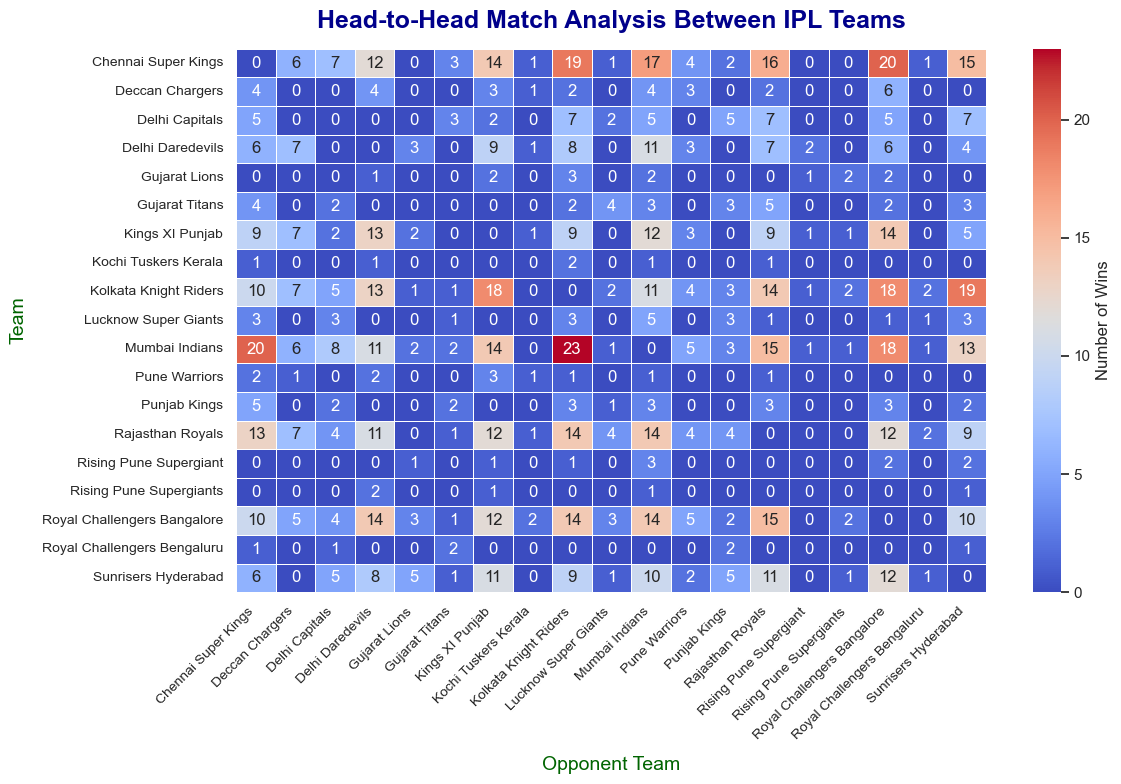

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
matches = pd.read_csv("matches.csv")

# Step 1: Prepare data for head-to-head analysis
head_to_head = []

# Count matches won by each team against another team
for _, row in matches.iterrows():
    if row['winner'] == row['team1']:
        head_to_head.append({'team1': row['team1'], 'team2': row['team2'], 'win': 1})
    elif row['winner'] == row['team2']:
        head_to_head.append({'team1': row['team2'], 'team2': row['team1'], 'win': 1})

# Convert the list to a DataFrame
head_to_head = pd.DataFrame(head_to_head)

# Aggregate the wins
head_to_head = head_to_head.groupby(['team1', 'team2']).sum().reset_index()

# Step 2: Create a pivot table for the heatmap
head_to_head_pivot = head_to_head.pivot(index="team1", columns="team2", values="win").fillna(0)

# Convert the pivot table values to integers
head_to_head_pivot = head_to_head_pivot.astype(int)

# Step 3: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.heatmap(
    head_to_head_pivot,
    annot=True,  # Display values inside the cells
    fmt="d",     # Integer format for annotations
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Number of Wins"}
)

# Add titles and labels
plt.title('Head-to-Head Match Analysis Between IPL Teams', fontsize=18, weight='bold', color='darkblue', pad=15)
plt.xlabel('Opponent Team', fontsize=14, labelpad=10, color='darkgreen')
plt.ylabel('Team', fontsize=14, labelpad=10, color='darkgreen')

# Customize ticks
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_9668\258629585.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['winner'] == x.iloc[0]['team1']).sum())  # Explicitly reference the group


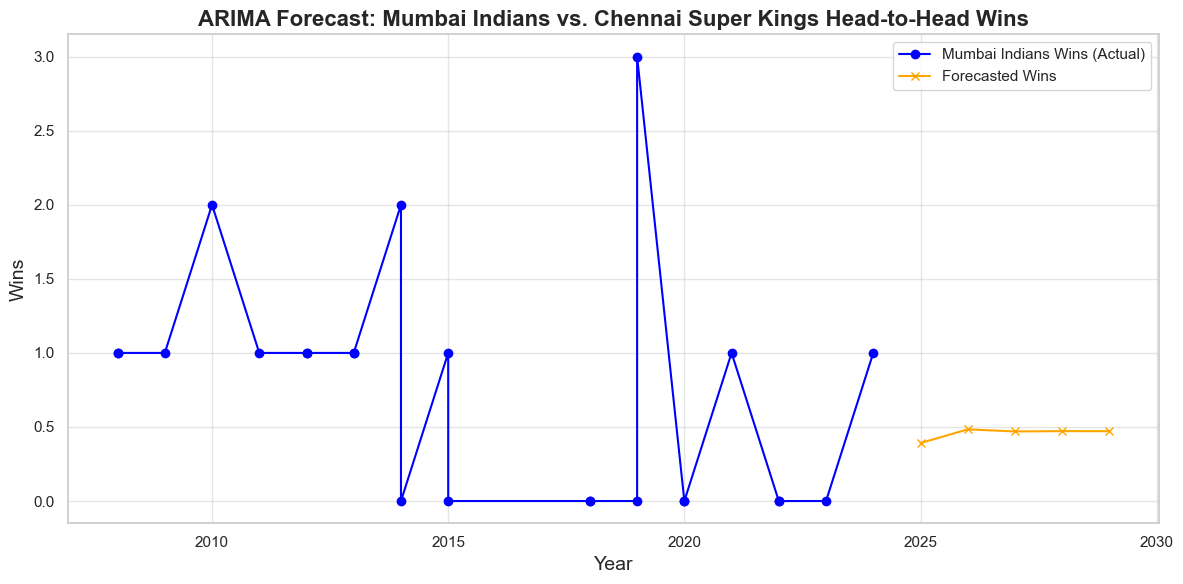

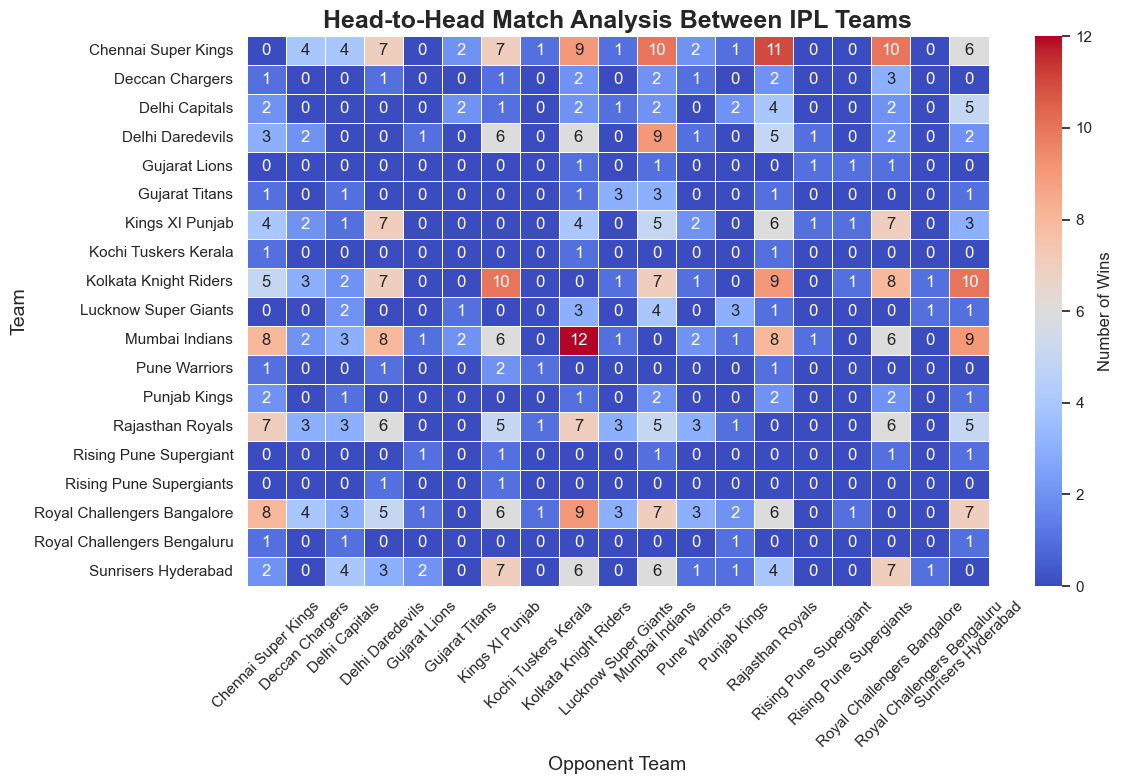

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
matches = pd.read_csv("matches.csv")

# Step 1: Prepare data for yearly head-to-head analysis
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year

# Fix for DeprecationWarning - Avoid modifying grouping columns
head_to_head_time_series = (
    matches.groupby(['year', 'team1', 'team2'])
    .apply(lambda x: (x['winner'] == x.iloc[0]['team1']).sum())  # Explicitly reference the group
    .reset_index(name='team1_wins')
)

# Select a specific head-to-head (e.g., "Mumbai Indians" vs. "Chennai Super Kings")
team1 = "Mumbai Indians"
team2 = "Chennai Super Kings"
head_to_head_filtered = head_to_head_time_series[
    ((head_to_head_time_series['team1'] == team1) & (head_to_head_time_series['team2'] == team2)) |
    ((head_to_head_time_series['team1'] == team2) & (head_to_head_time_series['team2'] == team1))
].sort_values('year')

# Step 2: Reshape the data for ARIMA
# Fix ValueWarning by using a sequential integer index
head_to_head_filtered = head_to_head_filtered.reset_index(drop=True)
team1_wins = head_to_head_filtered['team1_wins']

# Step 3: Apply ARIMA to forecast future matches
if len(team1_wins) > 2:  # ARIMA requires at least 3 data points
    model = ARIMA(team1_wins, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)  # Forecast for the next 5 years

    # Step 4: Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(head_to_head_filtered['year'], team1_wins, marker='o', label=f"{team1} Wins (Actual)", color='blue')
    plt.plot(
        range(head_to_head_filtered['year'].iloc[-1] + 1, head_to_head_filtered['year'].iloc[-1] + 6),
        forecast,
        marker='x',
        label="Forecasted Wins",
        color='orange'
    )
    plt.title(f"ARIMA Forecast: {team1} vs. {team2} Head-to-Head Wins", fontsize=16, weight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Wins", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points for ARIMA forecasting.")

# Step 5: Heatmap Visualization (Fix ValueError for fmt="d")
head_to_head_pivot = head_to_head_time_series.pivot_table(
    index='team1', columns='team2', values='team1_wins', aggfunc='sum'
).fillna(0)

# Convert pivot table values to integers for fmt="d"
head_to_head_pivot = head_to_head_pivot.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(
    head_to_head_pivot, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5,
    cbar_kws={"label": "Number of Wins"}
)
plt.title('Head-to-Head Match Analysis Between IPL Teams', fontsize=18, weight='bold')
plt.xlabel('Opponent Team', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()